<a href="https://colab.research.google.com/github/esradag/pytorch-derin-ogrenme/blob/main/03_Pytorch_G%C3%B6r%C3%BCnt%C3%BC_i%C5%9Fleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Görüntü İşleme

[Görüntü işleme](https://en.wikipedia.org/wiki/Computer_vision), bir bilgisayara görme yeteneği kazandırma sanatıdır.

Örneğin, bir fotoğrafın kedi mi yoksa köpek mi olduğunu sınıflandıran bir model geliştirmek olabilir ([ikili sınıflandırma](https://developers.google.com/machine-learning/glossary#binary-classification)).

Ya da bir fotoğrafın kedi, köpek veya tavuk olup olmadığını belirlemek olabilir ([çoklu sınıf sınıflandırma](https://developers.google.com/machine-learning/glossary#multi-class-classification)).

Veya bir videoda bir arabanın hangi karede yer aldığını tespit etmek olabilir ([nesne tespiti](https://en.wikipedia.org/wiki/Object_detection)).

Ya da bir görüntüde farklı nesnelerin nerelerde ayrılabileceğini bulmak olabilir ([panoptik segmentasyon](https://arxiv.org/abs/1801.00868)).

![örnek bilgisayar vision problemleri](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*İkili sınıflandırma, çoklu sınıf sınıflandırma, nesne tespiti ve segmentasyon için örnek bilgisayar vision problemleri.*


## Görüntü işleme nerelerde kullanılır?

Bir akıllı telefon kullanıyorsanız, bilgisayar vision'u zaten kullanıyorsunuz demektir.

Kamera ve fotoğraf uygulamaları, görüntüleri [görüntü işleme ile geliştirir](https://machinelearning.apple.com/research/panoptic-segmentation).

Modern arabalar, diğer araçlardan kaçınmak ve şeritlerde kalmak için [görüntü işleme kullanır](https://youtu.be/j0z4FweCy4M?t=2989).

Üreticiler, çeşitli ürünlerdeki hataları tespit etmek için görüntü işleme kullanır.

Güvenlik kameraları, potansiyel girişimcileri tespit etmek için görüntü işleme kullanır.

Özetle, görsel anlamda tanımlanabilen her şey bir bilgisayar vision problemi olabilir.


## Konu Başlıklarımız

Önceki bölümlerde öğrendiğimiz PyTorch iş akışını, görüntü işleme uygulamalarına uyarlayacağız.

![PyTorch iş akışının görüntü işleme odaklı versiyonu](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Özellikle, şu konuları ele alacağız:

| **Konu** | **İçerik** |
| ----- | ----- |
| **0. PyTorch'ta görüntü işleme kütüphaneleri** | PyTorch, görüntü işleme problemleri için kullanabileceğiniz bir dizi yerleşik kütüphane içeriyor, bunları inceleyeceğiz. |
| **1. Veriyi yükleme** | Görüntü işleme üzerine pratik yapmaya başlamak için [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) veri seti ile başlayacağız. |
| **2. Veriyi hazırlama** | Bazı görsellerimiz var, onları bir [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) ile yükleyip, eğitim döngüsünde kullanacağız. |
| **3. Model 0: Temel bir model oluşturma** | Burada, verilerdeki desenleri öğrenmek için bir çoklu sınıf sınıflandırma modeli oluşturacağız, ayrıca bir **kayıp fonksiyonu**, **optimizer** ve **eğitim döngüsü** seçeceğiz. |
| **4. Model 0 ile tahmin yapma ve değerlendirme** | Temel modelimizle bazı tahminler yapalım ve değerlendirelim. |
| **5. Gelecek modeller için cihaz bağımsız kod ayarlama** | En iyi uygulama, cihaz bağımsız kod yazmak, bu yüzden bunu ayarlayalım. |
| **6. Model 1: Doğrusal olmayanlık ekleme** | Makine öğreniminin büyük bir parçası deneme yapmaktır, temel modelimizi doğrusal olmayan katmanlar ekleyerek iyileştirmeyi deneyelim. |
| **7. Model 2: Konvolüsyonel Sinir Ağı (CNN)** | Görüntü işleme odaklı olarak güçlü bir konvolüsyonel sinir ağı mimarisi tanıtalım. |
| **8. Modellerimizi karşılaştırma** | Üç farklı model oluşturduk, onları karşılaştıralım. |
| **9. En iyi modelimizi değerlendirme** | Rastgele görseller üzerinde bazı tahminler yapalım ve en iyi modelimizi değerlendirelim. |
| **10. Karışıklık matrisi oluşturma** | Karışıklık matrisi, sınıflandırma modellerini değerlendirmek için harika bir yöntemdir, nasıl yapılacağını görelim. |
| **11. En iyi performans gösteren modeli kaydetme ve yükleme** | Modelimizi daha sonra kullanmak isteyebiliriz, o yüzden kaydedelim ve düzgün bir şekilde tekrar yüklediğimizden emin olalım. |



## Yardım Nerede Bulunabilir?

Bu kurs için tüm materyaller [GitHub'da](https://github.com/mrdbourke/pytorch-deep-learning) mevcuttur.

Sorun yaşarsanız, kursun [GitHub Discussions sayfasında](https://github.com/mrdbourke/pytorch-deep-learning/discussions) bir soru sorabilirsiniz.

Ve tabii ki, [PyTorch belgeleri](https://pytorch.org/docs/stable/index.html) ve [PyTorch geliştirici forumları](https://discuss.pytorch.org/), PyTorch ile ilgili her şey için çok yardımcı bir yerdir.

## 0. PyTorch'ta Görüntü İşleme Kütüphaneleri

Kod yazmaya başlamadan önce, PyTorch'ta kullanmanız gereken bazı görüntü işleme kütüphanelerini konuşalım.

| PyTorch modülü | Ne işe yarar? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Görüntü işleme problemleri için sıklıkla kullanılan veri setleri, model mimarileri ve görüntü dönüşümleri içerir. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Burada, görüntü sınıflandırma, nesne tespiti, görüntü başlıklandırma, video sınıflandırma ve daha fazlası için birçok örnek veri seti bulabilirsiniz. Ayrıca, [özel veri setleri oluşturmak için bazı temel sınıfları içerir](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | Bu modül, PyTorch'ta yaygın olarak kullanılan ve iyi performans gösteren görüntü işleme model mimarilerini içerir, bunları kendi problemlerinizle kullanabilirsiniz. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Görüntülerin bir modele kullanmadan önce dönüştürülmesi (sayılara dönüştürülmesi, işlenmesi, artırılması) gerekir, burada sık kullanılan görüntü dönüşümleri bulunur. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | PyTorch için temel veri seti sınıfıdır. |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Bir veri seti üzerinde Python iteratörü oluşturur (bu, `torch.utils.data.Dataset` ile oluşturulur). |

> **Not:** `torch.utils.data.Dataset` ve `torch.utils.data.DataLoader` sınıfları yalnızca PyTorch'ta görüntü işleme için değildir, bunlar farklı veri türleriyle de çalışabilir.

Şimdi, PyTorch'ta bazı önemli görüntü işleme kütüphanelerini inceledik, ilgili bağımlılıkları içe aktaralım.


In [ ]:
# PyTorch'u içe aktaralım
import torch
from torch import nn

# torchvision'u içe aktaralım
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Görselleştirme için matplotlib'ı içe aktaralım
import matplotlib.pyplot as plt

# Sürümleri kontrol edelim
# Not: PyTorch sürümünüz 1.10.0'dan düşük olmamalı ve torchvision sürümünüz 0.11'den düşük olmamalı
print(f"PyTorch sürümü: {torch.__version__}\ntorchvision sürümü: {torchvision.__version__}")


PyTorch sürümü: 2.5.1+cu121
torchvision sürümü: 0.20.1+cu121


## 1. Veri Seti Alma

Bir görüntü işleme problemi üzerinde çalışmaya başlamak için, bir görüntü işleme veri seti alalım.

FashionMNIST ile başlayacağız.

MNIST, Modified National Institute of Standards and Technology'in kısaltmasıdır.

[Orijinal MNIST veri seti](https://en.wikipedia.org/wiki/MNIST_database), binlerce el yazısı rakam örneği (0'dan 9'a kadar) içerir ve posta servisleri için rakamları tanıyan görüntü işleme modelleri oluşturmak için kullanılmıştır.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), Zalando Araştırma tarafından yapılmıştır, benzer bir kurulum vardır.

Ancak, 10 farklı türde giysinin gri tonlamalı görsellerini içerir.

![FashionMNIST örnek resmi](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets`, üzerinde görüntü işleme kodu yazma pratiği yapabileceğiniz birçok örnek veri seti içerir. FashionMNIST, bu veri setlerinden bir tanesidir. Ve 10 farklı sınıfı (farklı giysi türleri) olduğu için çoklu sınıf sınıflandırma problemidir.*

Daha sonra, bu görsellerdeki farklı giysi stillerini tanımlayan bir görüntü işleme sinir ağı inşa edeceğiz.

PyTorch, `torchvision.datasets` içinde birçok yaygın görüntü işleme veri seti saklar.

Bunlar arasında [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) yer alır.

Veriyi indirmek için şu parametreleri sağlarız:
* `root: str` - veriyi hangi klasöre indirmek istersiniz?
* `train: Bool` - eğitim verisi mi yoksa test verisi mi almak istersiniz?
* `download: Bool` - veri indirilsin mi?
* `transform: torchvision.transforms` - veriye hangi dönüşümleri uygulamak istersiniz?
* `target_transform` - hedefleri (etiketleri) dönüştürebilirsiniz.

`torchvision`'daki diğer veri setlerinin de bu parametre seçenekleri vardır.


In [ ]:
# Eğitim Verisini Ayarlama
train_data = datasets.FashionMNIST(
    root="data", # verinin nereye indirileceğini belirleyin
    train=True, # eğitim verisini alın
    download=True, # veri disk üzerinde yoksa indirilsin
    transform=ToTensor(), # görseller PIL formatında gelir, biz bunları Torch tensörlerine dönüştürmek istiyoruz
    target_transform=None # etiketleri de dönüştürebilirsiniz
)
# Test Verisini Ayarlama
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # test verisini alın
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 22.5MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 351kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.34MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.3MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



İlk eğitim verisi örneğine göz atalım.

In [ ]:
# İlk eğitim örneğini görüntüleyelim
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Görüntü İşleme Modelinin Girdi ve Çıktı Şekilleri

Elimizde büyük bir tensör var (görüntü) ve bu tensör tek bir değere (etiket) dönüşüyor.

Görüntü şekline bakalım.

In [ ]:
# Görüntünün şekli nedir?
image.shape


torch.Size([1, 28, 28])

Görüntü tensörünün şekli `[1, 28, 28]` veya daha spesifik olarak:
```
[color_channels=1, height=28, width=28]
```

`color_channels=1` olması, görüntünün gri tonlamalı olduğunu gösterir.

![fashionMNIST problemine ait örnek girdi ve çıktı şekilleri](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
*Çeşitli problemler farklı girdi ve çıktı şekillerine sahip olabilir. Ancak temel prensip aynıdır: veriyi sayılara dönüştür, bu sayılarda desenler bulacak bir model oluştur, ve bu desenleri anlamlı bir şekilde dönüştür.*

Eğer `color_channels=3` olsaydı, görüntüde kırmızı, yeşil ve mavi (RGB renk modeli) için piksellerin değerleri olurdu.

Görüntü tensörümüzün sırası genellikle `CHW` (Renk Kanalları, Yükseklik, Genişlik) olarak adlandırılır.

Görüntüler `CHW` (renk kanalları önce) veya `HWC` (renk kanalları sonra) olarak temsil edilmeli mi, diye bir tartışma vardır.

> **Not:** `NCHW` ve `NHWC` formatlarını da görebilirsiniz, burada `N` *görüntü sayısını* ifade eder. Örneğin eğer `batch_size=32` varsa, tensör şekliniz `[32, 1, 28, 28]` olabilir. Daha sonra batch size'dan bahsedeceğiz.

PyTorch genellikle `NCHW` (renk kanalları önce) formatını varsayılan olarak kabul eder.

Ancak, PyTorch ayrıca `NHWC` (renk kanalları sonra) formatının daha iyi performans gösterdiğini ve [en iyi uygulama](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice) olarak kabul edildiğini açıklar.

Şu anda veri setimiz ve modellerimiz nispeten küçük olduğu için bu çok fazla fark yaratmayacaktır.

Ancak, daha büyük görüntü veri setleri üzerinde çalışırken ve evrişimsel sinir ağlarını (CNN) kullanırken bunu aklınızda bulundurun (bunları daha sonra göreceğiz).

Verimizin daha fazla şekline göz atalım.

In [ ]:
# Kaç tane örnek var?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)


Bu durumda 60.000 eğitim örneği ve 10.000 test örneğimiz var.

Peki hangi sınıflar var?

Bunları `.classes` özelliğiyle bulabiliriz.

In [ ]:
# Sınıflara göz atalım
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Harika! Görünen o ki 10 farklı türde giysi ile karşılaşıyoruz.

Çünkü 10 farklı sınıfımız var, bu da demek oluyor ki problemimiz **çoklu sınıf sınıflandırma**.

Hadi verimizi görselleştirelim.

### 1.2 Verimizi Görselleştirme

Görüntü şekli: torch.Size([1, 28, 28])


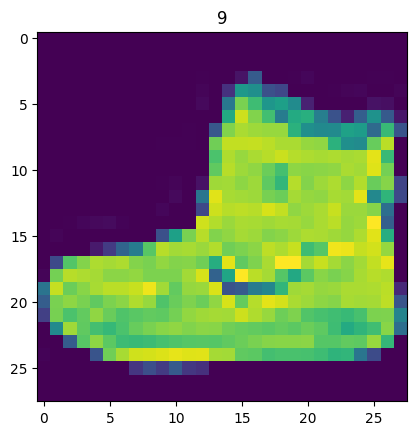

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Görüntü şekli: {image.shape}")
plt.imshow(image.squeeze()) # görüntü şekli [1, 28, 28] (renk kanalları, yükseklik, genişlik)
plt.title(label);

Görüntüyü gri tonlamaya dönüştürmek için `plt.imshow()`'un `cmap` parametresini kullanabiliriz.

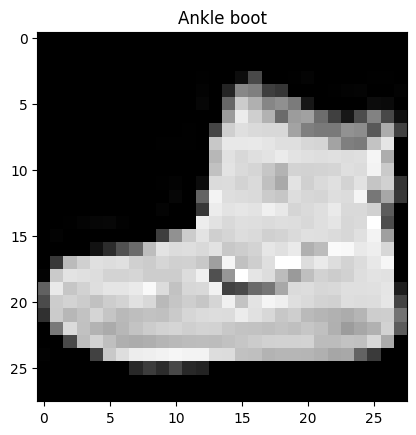

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Harika, ya da en azından pikselleşmiş bir gri tonlamalı bilek çizmeleri kadar harika.

Hadi bir kaç tane daha görelim.

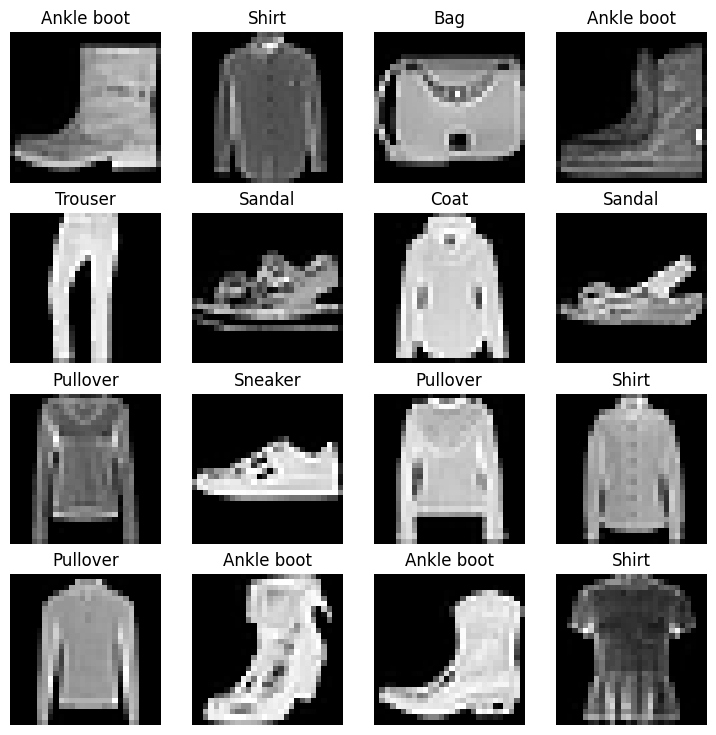

In [ ]:
# Daha fazla görüntü çizelim
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

Hmmm, bu veri seti pek estetik görünmüyor.

Ancak, bu veri seti için öğrenmeye başlayacağımız model oluşturma ilkeleri, çok çeşitli görüntü işleme problemleri için benzer olacaktır.

Özünde, piksel değerlerini alıp, bu değerlerdeki desenleri bulmak ve bunları gelecekteki piksel değerleri üzerinde kullanmak.

Ayrıca, bu küçük veri seti için (evet, derin öğrenme için 60.000 görsel bile oldukça küçük sayılır), her birini sınıflandırmak için bir program yazabilir misiniz?

Muhtemelen yazabilirsiniz.

Ama sanırım PyTorch'da bir model kodlamak çok daha hızlı olurdu.

> **Soru:** Yukarıdaki veri yalnızca düz (doğrusal) çizgilerle modellenebilir mi? Yoksa eğri (doğrusal olmayan) çizgilere de mi ihtiyaç duyulurdu?


## 2. Veri Yükleyici Hazırlama

Şimdi veri setimizi kullanıma hazır hale getirdik.

Bir sonraki adım, bunu [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) veya kısaca `DataLoader` ile hazırlamak.

`DataLoader`, tahmin edebileceğiniz gibi, veri yükleme işini yapar.

Eğitim ve çıkarım (inference) için veriyi modele yükler.

Bir büyük `Dataset`'i daha küçük parçalara (mini-batch'lere) ayırarak bir Python yineleyicisine dönüştürür.

Bu daha küçük parçalar, **batch'ler** veya **mini-batch'ler** olarak adlandırılır ve `batch_size` parametresiyle ayarlanabilir.

Neden böyle yapalım?

Çünkü bu, daha hesaplamalı olarak verimlidir.

İdeal bir dünyada, tüm veriler üzerinde bir ileri geçiş (forward pass) ve geri geçiş (backward pass) yapılabilir.

Ancak gerçekten büyük veri setleri kullanmaya başladığınızda, sonsuz işlem gücünüz yoksa, veriyi mini-batch'lere ayırmak daha kolaydır.

Ayrıca modelin daha fazla gelişme fırsatı da sunar.

**Mini-batch'lerde** (verinin küçük bölümleri), her epoch'ta değil, her mini-batch'te bir kez, gradyan inişi (gradient descent) yapılır.

İyi bir batch size nedir?

[32 iyi bir başlangıçtır](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) pek çok problem için.

Ama bu, ayarlayabileceğiniz bir **hiperparametre** olduğu için farklı değerlerle deneyebilirsiniz, genellikle 2'nin katları daha yaygın olarak kullanılır (örneğin 32, 64, 128, 256, 512).

![batch'lenmiş FashionMNIST örneği](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*FashionMNIST'in 32 batch boyutu ve karıştırma (shuffle) açıldığında nasıl batch'lendiği. Diğer veri setlerinde de benzer bir batch işleme olacak, ancak batch boyutuna göre değişiklik gösterebilir.*

Şimdi, eğitim ve test veri setlerimiz için `DataLoader`'ları oluşturalım.


In [ ]:
from torch.utils.data import DataLoader

# Batch boyutunu ayarlayın
BATCH_SIZE = 32

# Veri setlerini yineleyicilere (batch'lere) dönüştürün
train_dataloader = DataLoader(train_data, # yineleyiciye dönüştürülecek veri seti
    batch_size=BATCH_SIZE, # her batch'te kaç örnek olacak?
    shuffle=True # her epoch'ta veriyi karıştırsın mı?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # test verisini karıştırmaya gerek yok
)

# Oluşturduğumuz şeyleri kontrol edelim
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Training dataloader uzunluğu: {len(train_dataloader)} batch, her biri {BATCH_SIZE}")
print(f"Test dataloader uzunluğu: {len(test_dataloader)} batch, her biri {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fd380f9b490>, <torch.utils.data.dataloader.DataLoader object at 0x7fd38bef2a90>)
Training dataloader uzunluğu: 1875 batch, her biri 32
Test dataloader uzunluğu: 313 batch, her biri 32


In [ ]:
# Eğitim dataloader'ının içeriğine göz atalım
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))


Ve veri tek bir örneği kontrol ederek değişmeden kaldığını görelim.


Görüntü boyutu: torch.Size([1, 28, 28])
Etiket: 6, etiket boyutu: torch.Size([])


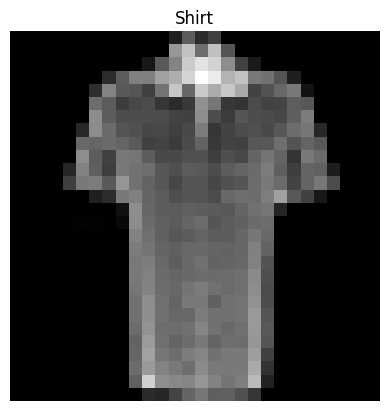

In [ ]:
# Bir örnek gösterelim
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Görüntü boyutu: {img.shape}")
print(f"Etiket: {label}, etiket boyutu: {label.shape}")







## 3. Model 0: Temel Bir Model Oluşturma

Veri yüklendi ve hazır!

Şimdi bir **temel model** oluşturalım, bunu `nn.Module` sınıfını alt sınıflandırarak yapacağız.

Bir **temel model**, hayal edebileceğiniz en basit modellerden biridir.

Bu modeli bir başlangıç noktası olarak kullanıp, onu daha sonraki, daha karmaşık modellerle geliştirmeye çalışırsınız.

Temel modelimiz iki [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) katmanından oluşacak.

Bunu önceki bir bölümde yapmıştık ama burada küçük bir fark olacak.

Çünkü görüntü verisiyle çalışıyoruz, işin başında farklı bir katman kullanacağız.

Ve bu katman [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) katmanı.

`nn.Flatten()` katmanı, bir tensörün boyutlarını tek bir vektöre sıkıştırır.

Bunu görmek daha kolaydır.

In [ ]:
# Bir flatten katmanı oluşturun
flatten_model = nn.Flatten() # tüm nn modülleri model gibi çalışır (forward pass yapılabilir)

# Tek bir örnek alalım
x = train_features_batch[0]

# Örneği flatten (düzleştir)
output = flatten_model(x) # forward pass yapalım

# Ne olduğunu yazdıralım
print(f"Flatten işleminden önce şekil: {x.shape} -> [color_channels, height, width]")
print(f"Flatten işleminden sonra şekil: {output.shape} -> [color_channels, height*width]")

# Aşağıyı yorum satırından çıkarıp ne olduğunu görün
#print(x)
#print(output)

Flatten işleminden önce şekil: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Flatten işleminden sonra şekil: torch.Size([1, 784]) -> [color_channels, height*width]



`nn.Flatten()` katmanı, şeklimizi `[color_channels, height, width]`'ten `[color_channels, height*width]`'e dönüştürdü.

Bunu neden yapıyoruz?

Çünkü artık piksel verimizi yükseklik ve genişlik boyutlarından bir uzun **özellik vektörüne** dönüştürdük.

Ve `nn.Linear()` katmanları, girdilerinin özellik vektörü şeklinde olmasını sever.

Şimdi, `nn.Flatten()`'i ilk katman olarak kullanarak ilk modelimizi oluşturalım.


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Sinir ağları, girdilerini vektör formunda sever
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = veri örneğindeki özellik sayısı (784 piksel)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

Harika!

Şimdi kullanabileceğimiz bir temel model sınıfımız var, şimdi modelimizi örnekleyelim.

Şu parametreleri ayarlamamız gerekecek:
* `input_shape=784` - modele giden özelliklerin sayısı, bu durumda hedef görseldeki her bir piksel için bir özellik var (28 piksel yüksekliğinde, 28 piksel genişliğinde = 784 özellik).
* `hidden_units=10` - gizli katmanda kullanılacak birim/neurona sayısı, bu sayı istediğiniz gibi olabilir ancak modeli küçük tutmak için `10` ile başlayalım.
* `output_shape=len(class_names)` - çünkü çoklu sınıf sınıflandırma problemiyle çalışıyoruz, veri setimizdeki her sınıf için bir çıktı nöronu gerekecek.

Şimdi modelimizin bir örneğini oluşturalım ve başta CPU'ya gönderelim (yakında `model_0`'ı CPU ile GPU karşılaştırması yaparak test edeceğiz).


In [ ]:
torch.manual_seed(42)

# Modeli giriş parametreleriyle ayarlayın
model_0 = FashionMNISTModelV0(input_shape=784, # her piksel için bir özellik (28x28)
    hidden_units=10, # gizli katmanda kaç birim olacak
    output_shape=len(class_names) # her sınıf için bir özellik
)
model_0.to("cpu") # modelimizi başlangıçta CPU'ya gönderelim


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Loss, optimizer ve değerlendirme metriklerini ayarlama

Çünkü bir sınıflandırma problemiyle çalışıyoruz, [helper_functions.py](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) dosyamızı içeri alalım ve ardından [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/)'de tanımladığımız `accuracy_fn()` fonksiyonunu kullanalım.

> **Not:** Kendi doğruluk fonksiyonumuzu ya da değerlendirme metriklerimizi içeri alıp kullanmak yerine, [TorchMetrics paketinden](https://torchmetrics.readthedocs.io/en/latest/) çeşitli değerlendirme metriklerini içeri alabiliriz.


In [ ]:
import requests
from pathlib import Path

# Helper fonksiyonlarını Learn PyTorch repo'sundan indirin (henüz indirildi değilse)
if Path("helper_functions.py").is_file():
  print("helper_functions.py zaten var, indirme atlanıyor")
else:
  print("helper_functions.py indiriliyor")
  # Not: bunun çalışması için "raw" GitHub URL'sine ihtiyacınız var
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py indiriliyor


In [ ]:

# Doğruluk metriğini içeri alalım
from helper_functions import accuracy_fn # Not: torchmetrics.Accuracy() da kullanılabilir

# Loss fonksiyonu ve optimizer'ı ayarlayalım
loss_fn = nn.CrossEntropyLoss() # buna bazen "criterion"/"cost function" da denir
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Deneylerimizi Zamanlamak için Bir Fonksiyon Oluşturma

Kaybı (loss function) ve optimizörü (optimizer) hazırladık!

Artık modeli eğitmeye başlama zamanı.

Ama ya eğitim sırasında bir deney yaparsak?

Yani, modelimizi CPU'da eğitirken geçen zamanı ölçmek için bir zamanlama fonksiyonu oluşturalım.

Bu modeli CPU üzerinde eğiteceğiz, ancak bir sonraki modeli GPU üzerinde eğiteceğiz ve ne olacağını göreceğiz.

Zamanlama fonksiyonumuz, Python'un [`timeit`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) modülünden [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) fonksiyonunu içerecek.


In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Başlangıç ve bitiş zamanları arasındaki farkı yazdırır.

    Argümanlar:
        start (float): Hesaplamanın başlangıç zamanı (tercihen timeit formatında).
        end (float): Hesaplamanın bitiş zamanı.
        device ([type], optional): Hesaplamanın çalıştığı cihaz. Varsayılan None'dur.

    Döndürür:
        float: Başlangıç ve bitiş arasındaki süre (saniye cinsinden, yüksek olan daha uzun).
    """
    total_time = end - start
    print(f"{device} üzerinde eğitim süresi: {total_time:.3f} saniye")
    return total_time


### 3.3 Eğitim Döngüsü Oluşturma ve Verilerin Batch'leri Üzerinde Model Eğitme

Harika!

Görünüşe göre tüm parçalar hazır, bir zamanlayıcı, bir kayıp fonksiyonu, bir optimizör, bir model ve en önemlisi bazı veriler.

Şimdi bir eğitim döngüsü ve bir test döngüsü oluşturalım ve modelimizi eğitelim ve değerlendirelim.

Önceki defterlerdeki (notebook) aynı adımları kullanacağız, ancak verilerimiz artık batch (yığın) formunda olduğundan, verilerimizi batch'ler üzerinden geçirecek başka bir döngü ekleyeceğiz.

Veri batch'lerimiz, sırasıyla eğitim ve test verileri için `train_dataloader` ve `test_dataloader` içinde yer almaktadır.

Bir batch, `X` (özellikler) ve `y` (etiketler) olarak `BATCH_SIZE` kadar örnek içerir. `BATCH_SIZE=32` kullandığımızdan, batch'lerimiz 32 görüntü ve hedef örneği içerir.

Ve veriler üzerinde batch'ler halinde hesaplama yaptığımızdan, kayıp ve değerlendirme metriklerimiz **her batch başına** hesaplanacaktır, tüm veri seti yerine.

Bu, kayıp ve doğruluk değerlerimizi her dataset'in ilgili dataloader'ındaki batch sayısına bölmemiz gerektiği anlamına gelir.

Adımları takip edelim:  
1. Epoch'lar üzerinden döngü kurun.
2. Eğitim batch'leri üzerinde döngü kurun, eğitim adımlarını gerçekleştirin, her batch başına eğitim kaybını hesaplayın.
3. Test batch'leri üzerinde döngü kurun, test adımlarını gerçekleştirin, her batch başına test kaybını hesaplayın.
4. Ne olduğunu yazdırın.
5. Her şeyi zamanlayın (eğlencelik).

Birçok adım var ama...

...şüphede kalırsanız, kodlayın.


In [ ]:
# Progress çubuğu için tqdm'yi içe aktar
from tqdm.auto import tqdm

# Seed'i ayarla ve zamanlayıcıyı başlat
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Epoch sayısını ayarla (daha hızlı eğitim süreleri için bunu küçük tutacağız)
epochs = 3

# Eğitim ve test döngüsünü oluştur
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    ### Eğitim
    train_loss = 0
    # Eğitim batch'leri üzerinde döngü kur
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. İleri geçiş
        y_pred = model_0(X)

        # 2. Kayıp hesapla (her batch başına)
        loss = loss_fn(y_pred, y)
        train_loss += loss # epoch başına kaybı biriktir

        # 3. Optimizer sıfırla
        optimizer.zero_grad()

        # 4. Kayıp geriye doğru
        loss.backward()

        # 5. Optimizer adımı
        optimizer.step()

        # Kaç örneğin görüldüğünü yazdır
        if batch % 400 == 0:
            print(f"Toplamda {batch * len(X)}/{len(train_dataloader.dataset)} örneğe bakıldı")

    # Toplam eğitim kaybını train dataloader'ın uzunluğuna böl (epoch başına ortalama kayıp)
    train_loss /= len(train_dataloader)

    ### Test
    # Kayıp ve doğruluk biriktirilecek değişkenler oluştur
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. İleri geçiş
            test_pred = model_0(X)

            # 2. Kayıp hesapla (biriktirerek)
            test_loss += loss_fn(test_pred, y) # epoch başına kaybı biriktir

            # 3. Doğruluk hesapla (tahminlerin doğru etiketlerle eşleşmesi gerekir)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Test metrikleri üzerinde hesaplamalar torch.inference_mode() içinde yapılmalı
        # Toplam test kaybını test dataloader'ının uzunluğuna böl (her batch başına)
        test_loss /= len(test_dataloader)

        # Toplam doğruluğu test dataloader'ının uzunluğuna böl (her batch başına)
        test_acc /= len(test_dataloader)

    ## Ne olduğunu yazdır
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Eğitim süresini hesapla
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Toplamda 0/60000 örneğe bakıldı
Toplamda 12800/60000 örneğe bakıldı
Toplamda 25600/60000 örneğe bakıldı
Toplamda 38400/60000 örneğe bakıldı
Toplamda 51200/60000 örneğe bakıldı

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Toplamda 0/60000 örneğe bakıldı
Toplamda 12800/60000 örneğe bakıldı
Toplamda 25600/60000 örneğe bakıldı
Toplamda 38400/60000 örneğe bakıldı
Toplamda 51200/60000 örneğe bakıldı

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Toplamda 0/60000 örneğe bakıldı
Toplamda 12800/60000 örneğe bakıldı
Toplamda 25600/60000 örneğe bakıldı
Toplamda 38400/60000 örneğe bakıldı
Toplamda 51200/60000 örneğe bakıldı

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

cpu üzerinde eğitim süresi: 39.697 saniye


Harika! Görünüşe göre temel modelimiz oldukça iyi sonuçlar elde etti.

Eğitmesi de çok uzun sürmedi, hatta sadece CPU'da bile, acaba GPU'da hızlanır mı?

Şimdi modelimizi değerlendirmek için biraz kod yazalım.


## 4. Tahminler Yapın ve Model 0 Sonuçlarını Alın

Birkaç model geliştireceğimiz için, hepsini benzer şekilde değerlendirecek bir kod yazmak iyi bir fikir.

Özellikle, bir eğitimli modeli, bir `DataLoader`, bir kayıp fonksiyonu ve bir doğruluk fonksiyonu alan bir fonksiyon oluşturalım.

Bu fonksiyon, modeli kullanarak `DataLoader`'daki veriler üzerinde tahminler yapacak ve ardından bu tahminleri kayıp fonksiyonu ve doğruluk fonksiyonu ile değerlendireceğiz.


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Data_loader üzerinde modelin tahmin sonuçlarını içeren bir sözlük döndürür.

    Argümanlar:
        model (torch.nn.Module): Data_loader üzerinde tahmin yapabilen bir PyTorch modeli.
        data_loader (torch.utils.data.DataLoader): Tahmin yapılacak hedef veri seti.
        loss_fn (torch.nn.Module): Modelin kayıp fonksiyonu.
        accuracy_fn: Modelin tahminlerini doğru etiketlerle karşılaştırmak için doğruluk fonksiyonu.

    Döndürür:
        (dict): Modelin data_loader üzerinde tahmin yapma sonuçları.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Modelle tahmin yap
            y_pred = model(X)

            # Kayıp ve doğruluk değerlerini her batch başına biriktir
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # Doğruluk için tahmin etiketlerine ihtiyacımız var (logits -> pred_prob -> pred_labels)

        # Kayıp ve doğruluğu her batch başına ortalama bulmak için ölçeklendir
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # model sınıfla oluşturulmuşsa çalışır
            "model_loss": loss.item(),
            "model_acc": acc}

# Model 0 sonuçlarını test veri seti üzerinde hesapla
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Görünüşe göre gayet iyi!

Bu sözlüğü, temel model sonuçlarını daha sonraki modellerle karşılaştırmak için kullanabiliriz.


## 5. Cihazdan Bağımsız Kod Kurulumu (Var ise GPU kullanımı için)

PyTorch modelimizi 60.000 örnek üzerinde CPU'da eğitirken ne kadar zaman aldığını gördük.

> **Not:** Model eğitim süresi, kullanılan donanıma bağlıdır. Genelde, daha fazla işlemci daha hızlı eğitim anlamına gelir ve küçük modeller ve küçük veri setleri, büyük modeller ve büyük veri setlerine kıyasla genellikle daha hızlı eğitilir.

Şimdi, modellerimiz ve verilerimiz için [cihazdan bağımsız bir kod](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) kurarak, GPU'nun mevcut olması durumunda GPU'da çalışmasını sağlayalım.

Eğer bu not defterini Google Colab üzerinde çalıştırıyorsanız ve henüz GPU'yu etkinleştirmediyseniz, şimdi `Runtime -> Change runtime type -> Hardware accelerator -> GPU` yoluyla bir GPU açma zamanı. Bunu yaparsanız, çalışma ortamınız sıfırlanacak ve yukarıdaki tüm hücreleri `Runtime -> Run before` yoluyla tekrar çalıştırmanız gerekecek.


In [ ]:
# Cihazdan bağımsız kodu kur
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

Harika!

Hadi bir model daha kuralım.


## 6. Model 1: Daha İyi Bir Model Kurmak için Doğrusal Olmayan Fonksiyonlar

[Notebook 02'de doğrusal olmayan fonksiyonların gücünü](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity) öğrendik.

Çalıştığımız verilere bakarak, doğrusal olmayan fonksiyonlara ihtiyaç duyduğumuzu düşünüyor musunuz?

Ve unutmayın, doğrusal düz bir çizgi, doğrusal olmayan ise düz olmayan bir çizgi anlamına gelir.

Hadi bunu keşfedelim.

Bunu, daha önceki modele benzer bir model yaratarak yapacağız, ancak bu sefer her doğrusal katman arasında doğrusal olmayan fonksiyonlar (`nn.ReLU()`) ekleyeceğiz.


In [ ]:
# Doğrusal ve doğrusal olmayan katmanlara sahip bir model oluştur
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Girdileri tek bir vektöre dönüştür
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


Harika görünüyor.

Şimdi, önceki ayarlarla aynı şekilde modelimizi başlatalım.

Bize `input_shape=784` (görüntü verilerimizin özellik sayısına eşit), `hidden_units=10` (başlangıçta küçük tutuyoruz ve bu, temel modelimizle aynı) ve `output_shape=len(class_names)` (her sınıf için bir çıktı birimi) gerekecek.

> **Not:** Modelimizin çoğu ayarını değiştirmeden bıraktığımıza dikkat edin, yalnızca bir değişiklik yaptık: doğrusal olmayan katmanlar ekledik. Bu, bir dizi makine öğrenimi deneyini çalıştırırken standart bir uygulamadır, bir şeyi değiştirirsiniz ve ne olduğunu görürsünüz, sonra tekrar yaparsınız, tekrar, tekrar.


In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # giriş özellik sayısı
    hidden_units=10,
    output_shape=len(class_names) # istenen çıktı sınıfı sayısı
).to(device) # modeli GPU'ya gönder, eğer mevcutsa
next(model_1.parameters()).device # modelin hangi cihazda olduğunu kontrol et


device(type='cpu')

### 6.1 Kayıp, Optimizör ve Değerlendirme Metrikleri Kurulumu

Her zamanki gibi, bir kayıp fonksiyonu, bir optimizör ve bir değerlendirme metriği kuracağız (birden fazla değerlendirme metriği kullanabiliriz ancak şimdilik doğrulukla devam edeceğiz).


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


### 6.2 Eğitim ve Test Döngülerini Fonksiyon Haline Getirme

Şimdiye kadar, eğitim ve test döngülerini tekrar tekrar yazdık.

Onları tekrar yazalım ama bu sefer fonksiyonlar halinde yazacağız, böylece her seferinde tekrar çağrılabilirler.

Ve şimdi cihazdan bağımsız kod kullandığımız için, özellik (`X`) ve hedef (`y`) tensörlerimize `.to(device)` çağrısı yapmayı unutmayacağız.

Eğitim döngüsü için `train_step()` adında bir fonksiyon oluşturacağız, bu fonksiyon bir model, bir `DataLoader`, bir kayıp fonksiyonu ve bir optimizör alacak.

Test döngüsü benzer olacak, ancak `test_step()` olarak adlandırılacak ve bir model, bir `DataLoader`, bir kayıp fonksiyonu ve bir değerlendirme fonksiyonu alacak.

> **Not:** Bunlar fonksiyonlar olduğu için, istediğiniz gibi özelleştirebilirsiniz. Burada oluşturduğumuz şeyler, belirli sınıflandırma kullanım durumumuz için temel eğitim ve test fonksiyonları olarak kabul edilebilir.


In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Veriyi GPU'ya gönder
        X, y = X.to(device), y.to(device)

        # 1. İleri geçiş
        y_pred = model(X)

        # 2. Kayıp hesapla
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Logitlerden -> tahmin etiketlerine

        # 3. Optimizer sıfırla
        optimizer.zero_grad()

        # 4. Kayıp geriye doğru
        loss.backward()

        # 5. Optimizer adımı
        optimizer.step()

    # Epoch başına kayıp ve doğruluğu hesapla ve ne olduğunu yazdır
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # modeli eval moduna al
    # Inference context manager'ı aç
    with torch.inference_mode():
        for X, y in data_loader:
            # Veriyi GPU'ya gönder
            X, y = X.to(device), y.to(device)

            # 1. İleri geçiş
            test_pred = model(X)

            # 2. Kayıp ve doğruluğu hesapla
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Logitlerden -> tahmin etiketlerine
            )

        # Metrikleri ayarla ve yazdır
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


Woohoo!

Şimdi modelimizi eğitmek ve test etmek için bazı fonksiyonlarımız var, hadi bunları çalıştıralım.

Her epoch için bir eğitim ve bir test adımı yapacak şekilde bir döngü kuracağız.

Bu şekilde, her epoch için bir eğitim ve bir test adımımız olacak.

> **Not:** Test adımını ne sıklıkla yapacağınızı özelleştirebilirsiniz. Bazen insanlar her beş epoch'ta bir veya 10 epoch'ta bir test adımı yapar, ya da bizim durumumuzda her epoch'ta bir.

Ayrıca, GPU'da kodumuzun ne kadar sürdüğünü görmek için zamanı ölçelim.


In [ ]:
torch.manual_seed(42)

# Zamanı ölç
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

cpu üzerinde eğitim süresi: 28.516 saniye


Harika!

Modelimiz eğitildi ama eğitim süresi daha uzun sürdü mü?

> **Not:** CUDA ve CPU arasındaki eğitim süresi, kullandığınız CPU/GPU'nun kalitesine büyük ölçüde bağlıdır. Daha ayrıntılı bir cevap için okumaya devam edin.

> **Soru:** "GPU kullandım ama modelim daha hızlı eğitilmedi, bu neden olabilir?"
>
> **Cevap:** Bunun bir nedeni, veri setiniz ve modelinizin (bizim çalıştığımız veri seti ve model gibi) o kadar küçük olmasıdır ki, GPU kullanmanın faydaları, verilerin oraya aktarılması için geçen zamanla karşılaştırıldığında daha düşük kalır.
>
> CPU belleğinden (varsayılan) GPU belleğine veri kopyalama işlemi arasında küçük bir darboğaz vardır.
>
> Yani küçük modeller ve veri setleri için, hesaplama yapmanın en iyi yeri aslında CPU olabilir.
>
> Ancak daha büyük veri setleri ve modeller için, GPU'nun sunduğu hesaplama hızı genellikle veriyi oraya aktarmanın maliyetinden çok daha yüksek olacaktır.
>
> Ancak bu, kullandığınız donanıma büyük ölçüde bağlıdır. Pratik yaparak, modellerinizi eğitmek için en iyi yerin neresi olduğunu öğrenebilirsiniz.

Şimdi, eğitimli `model_1` modelimizi `eval_model()` fonksiyonumuzu kullanarak değerlendirelim ve nasıl gittiğine bakalım.


In [ ]:
torch.manual_seed(42)

# Not: Bu, `eval_model()` fonksiyonunun cihazdan bağımsız kod kullanmaması nedeniyle hata verecektir
model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

Oh hayır!

Görünüşe göre `eval_model()` fonksiyonumuz şu hatayı veriyor:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

Bu, verimizi ve modelimizi cihazdan bağımsız kod kullanacak şekilde ayarladık, ancak değerlendirme fonksiyonumuzu ayarlamadık.

Bunu, `eval_model()` fonksiyonumuza bir hedef `device` parametresi geçirerek düzeltebiliriz.

Sonra sonuçları tekrar hesaplamayı deneyelim.


In [ ]:
# Değerleri cihaza taşı
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Verilen bir modelin verilen bir veri seti üzerindeki değerlendirmesini yapar.

    Argümanlar:
        model (torch.nn.Module): Data_loader üzerinde tahmin yapabilen bir PyTorch modeli.
        data_loader (torch.utils.data.DataLoader): Tahmin yapılacak hedef veri seti.
        loss_fn (torch.nn.Module): Modelin kayıp fonksiyonu.
        accuracy_fn: Modelin tahminlerini doğru etiketlerle karşılaştırmak için doğruluk fonksiyonu.
        device (str, opsiyonel): Hesaplama yapılacak hedef cihaz. Varsayılan olarak cihaz kullanılır.

    Döndürür:
        (dict): Modelin data_loader üzerinde tahmin yapma sonuçları.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Veriyi hedef cihaza gönder
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Kayıp ve doğruluğu ölçeklendir
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # sadece model sınıfla oluşturulduğunda çalışır
            "model_loss": loss.item(),
            "model_acc": acc}

# Cihaza bağımsız kod ile model 1 sonuçlarını hesapla
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
# Temel model sonuçlarını kontrol et
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Vay canına, bu durumda doğrusal olmayan fonksiyonlar eklemek modelimizin temel modele göre daha kötü performans göstermesine neden oldu.

Bu, makine öğreniminde dikkat edilmesi gereken bir şeydir, bazen işe yarayacağını düşündüğünüz şey işe yaramaz.

Ve bazen işe yaramayacağını düşündüğünüz şey işe yarar.

Bu, bir yandan bilim, bir yandan sanattır.

Görünüşe göre modelimiz **aşırı uyum sağlama (overfitting)** yapıyor.

Aşırı uyum sağlama, modelimizin eğitim verisini iyi öğrendiği ancak bu desenlerin test verisine genellenmediği anlamına gelir.

Aşırı uyum sağlamayı düzeltmek için kullanılan iki ana yöntem:
1. Daha küçük veya farklı bir model kullanmak (bazı modeller belirli türdeki verileri diğerlerinden daha iyi öğrenir).
2. Daha büyük bir veri seti kullanmak (daha fazla veri, modelin genellenebilir desenler öğrenme şansını artırır).

Bunlardan daha fazlası var, ama bunu keşfetmeniz için bir meydan okuma olarak bırakıyorum.

Çevrimiçi olarak "makine öğreniminde aşırı uyumdan nasıl kaçınılır" diye arama yapmayı deneyin ve ne çıkacağını görün.

Bu arada, bir numaraya bakalım: farklı bir model kullanmak.


## 7. Model 2: Konvolüsyonel Sinir Ağı (CNN) Oluşturma

Tamam, şimdi işleri bir adım ileri götürme zamanı.

Bir [Konvolüsyonel Sinir Ağı](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN veya ConvNet) oluşturalım.

CNN'ler, görsel verilerde desenleri bulma yetenekleriyle bilinir.

Ve biz görsel verilerle çalıştığımız için, bir CNN modelinin temel modelimize kıyasla nasıl bir iyileştirme yapabileceğine bakalım.

Kullanacağımız CNN modeli, [CNN Explainer](https://poloclub.github.io/cnn-explainer/) websitesinden TinyVGG olarak bilinir.

Bu model, bir konvolüsyonel sinir ağının tipik yapısını takip eder:

`Giriş katmanı -> [Konvolüsyonel katman -> aktivasyon katmanı -> havuzlama katmanı] -> Çıktı katmanı`

Burada `[Konvolüsyonel katman -> aktivasyon katmanı -> havuzlama katmanı]` bölümü, gereksinimlere bağlı olarak büyütülüp birden fazla kez tekrarlanabilir.


### Hangi modeli kullanmalıyım?

> **Soru:** Bekle, CNN'lerin görseller için iyi olduğunu söylüyorsun, başka hangi model türlerinden haberdar olmam gerek?

İyi soru.

Bu tablo, hangi modelin kullanılacağını belirlemek için iyi bir genel rehberdir (ancak istisnalar vardır).

| **Problem tipi** | **Kullanılacak model (genellikle)** | **Kod örneği** |
| ----- | ----- | ----- |
| Yapısal veri (Excel tabloları, satır ve sütun verisi) | Gradient Boosted Modeller, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost kütüphanesi](https://xgboost.readthedocs.io/en/stable/) |
| Yapısal olmayan veri (görseller, ses, dil) | Konvolüsyonel Sinir Ağı, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **Not:** Yukarıdaki tablo sadece referans içindir, kullanacağınız model, üzerinde çalıştığınız probleme ve sahip olduğunuz kısıtlamalara (veri miktarı, gecikme gereksinimleri) büyük ölçüde bağlı olacaktır.

Yeterince model hakkında konuştuk, şimdi [CNN Explainer websitesindeki](https://poloclub.github.io/cnn-explainer/) modeli çoğaltan bir CNN oluşturalım.

![TinyVGG mimarisi, CNN explainer websitesi tarafından ayarlandı](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

Bunu yapmak için, `torch.nn`'den [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) ve [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) katmanlarını kullanacağız.


In [ ]:
# Konvolüsyonel Sinir Ağı Oluşturma
class FashionMNISTModelV2(nn.Module):
    """
    Model mimarisi TinyVGG'den kopyalanmıştır:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # Görüntü üzerindeki kare ne kadar büyük?
                      stride=1, # varsayılan
                      padding=1), # seçenekler = "valid" (padding yok) veya "same" (çıktı, girişle aynı şekle sahiptir) veya belirli bir sayı için int
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # varsayılan stride değeri kernel_size ile aynıdır
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Bu in_features şekli nereden geldi?
            # Çünkü ağımızın her katmanı, giriş verilerimizin şeklinin sıkıştırılmasına ve değiştirilmesine neden olur.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model_2


FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Harika!

Şimdiye kadarki en büyük modelimiz!

Yaptığımız şey, makine öğreniminde yaygın bir uygulamadır.

Bir model mimarisini bir yerde bulun ve kodla tekrarla.


### 7.1 `nn.Conv2d()` Adım Adım İnceleme

Yukarıdaki modelimizi kullanmaya başlayabiliriz ve ne olduğunu görebiliriz, ancak önce eklediğimiz iki yeni katmanı adım adım inceleyelim:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), yani bir konvolüsyonel katman.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), yani bir maksimum havuzlama katmanı.

> **Soru:** `nn.Conv2d()`'deki "2d" ne anlama geliyor?
>
> 2d, 2 boyutlu veriler içindir. Yani, görüntülerimizin iki boyutu vardır: yükseklik ve genişlik. Evet, renk kanal boyutu da vardır ancak her renk kanalının boyutu da yükseklik ve genişliktir.
>
> Diğer boyutlu veriler için (metin için 1D veya 3D nesneler için 3D) ayrıca `nn.Conv1d()` ve `nn.Conv3d()` de bulunmaktadır.

Bu katmanları test etmek için, CNN Explainer'da kullanılan veriye benzer bazı toy veriler oluşturalım.


In [ ]:
torch.manual_seed(42)

# Görüntü batch'inin boyutunda rastgele sayılar içeren örnek batch oluştur
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, renk_kanalları, yükseklik, genişlik]
test_image = images[0] # test için tek bir görüntü al
print(f"Görüntü batch şekli: {images.shape} -> [batch_size, renk_kanalları, yükseklik, genişlik]")
print(f"Tek bir görüntü şekli: {test_image.shape} -> [renk_kanalları, yükseklik, genişlik]")
print(f"Tek bir görüntü piksel değerleri:\n{test_image}")


Görüntü batch şekli: torch.Size([32, 3, 64, 64]) -> [batch_size, renk_kanalları, yükseklik, genişlik]
Tek bir görüntü şekli: torch.Size([3, 64, 64]) -> [renk_kanalları, yükseklik, genişlik]
Tek bir görüntü piksel değerleri:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,

Bir örnek `nn.Conv2d()` oluşturalım ve çeşitli parametreleri inceleyelim:
* `in_channels` (int) - Giriş görüntüsündeki kanal sayısı.
* `out_channels` (int) - Konvolüsyon ile üretilen kanal sayısı.
* `kernel_size` (int veya tuple) - Konvolüsyon filtresinin boyutu.
* `stride` (int veya tuple, opsiyonel) - Konvolüsyonel filtrenin bir seferde ne kadar adım attığı. Varsayılan: 1.
* `padding` (int, tuple, str) - Girişin dört tarafına eklenen padding. Varsayılan: 0.

![Bir Conv2d katmanının farklı parametreleriyle nasıl çalıştığını gösteren örnek](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*`nn.Conv2d()` katmanının hiperparametrelerini değiştirdiğinizde ne olduğunu gösteren örnek.*


In [ ]:
torch.manual_seed(42)

# TinyVGG ile aynı boyutlarda bir konvolüsyonel katman oluştur
# (parametrelerden herhangi birini değiştirip ne olduğunu görmeyi deneyin)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # burada "valid" veya "same" kullanmayı da deneyebilirsiniz

# Veriyi konvolüsyonel katmandan geçirin
conv_layer(test_image) # Not: PyTorch <1.11.0 kullanıyorsanız, bu hata verebilir çünkü şekil sorunları vardır (nn.Conv2d() 4D tensör bekler)


tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

Eğer tek bir görüntüyü geçirmeye çalışırsak, bir şekil uyuşmazlığı hatası alırız:

> `RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead`

> **Not:** Eğer PyTorch 1.11.0+ kullanıyorsanız, bu hata meydana gelmez.

Bu, `nn.Conv2d()` katmanımızın girdi olarak `(N, C, H, W)` boyutlarında yani `[batch_size, renk_kanalları, yükseklik, genişlik]` şeklinde 4 boyutlu bir tensör beklemesindendir.

Şu anki tek görüntümüz `test_image`, sadece `[renk_kanalları, yükseklik, genişlik]` şeklinde yani `[3, 64, 64]` boyutlarına sahiptir.

Bunu, tek bir görüntü için `test_image.unsqueeze(dim=0)` kullanarak düzeltebiliriz, böylece `N` için ekstra bir boyut eklemiş oluruz.


In [ ]:
# Test görüntüsüne ekstra boyut ekle
test_image.unsqueeze(dim=0).shape


torch.Size([1, 3, 64, 64])

In [ ]:
# Ekstra boyut eklenmiş test görüntüsünü konvolüsyonel katmandan geçir
conv_layer(test_image.unsqueeze(dim=0)).shape


torch.Size([1, 10, 62, 62])

Hmm, şeklimizde ne olduğunu fark ettiniz mi (bu, [CNN Explainer](https://poloclub.github.io/cnn-explainer/) üzerindeki TinyVGG'nin ilk katmanıyla aynı şekil)? Farklı kanal boyutları ve farklı piksel boyutları alıyoruz.

Peki ya `conv_layer`'ın değerlerini değiştirsek ne olur?


In [ ]:
torch.manual_seed(42)
# Farklı değerlerle yeni bir conv_layer oluştur (bunları istediğiniz gibi ayarlamayı deneyin)
conv_layer_2 = nn.Conv2d(in_channels=3, # giriş görüntümüzle aynı renk kanalı sayısı
                         out_channels=10,
                         kernel_size=(5, 5), # kernel genellikle bir kare olduğundan, tuple da çalışır
                         stride=2,
                         padding=0)

# Tek bir görüntüyü yeni conv_layer_2'den geçirin (bu, giriş üzerinde nn.Conv2d()'in forward() metodunu çağırır)
conv_layer_2(test_image.unsqueeze(dim=0)).shape


torch.Size([1, 10, 30, 30])

Vay, başka bir şekil değişikliği gördük.

Şimdi görüntümüz `[1, 10, 30, 30]` şeklinde (farklı değerler kullanırsanız bu farklı olabilir) veya `[batch_size=1, renk_kanalları=10, yükseklik=30, genişlik=30]` şeklinde.

Burada ne oluyor?

İçsel olarak, `nn.Conv2d()` katmanımız, görüntüdeki veriyi sıkıştırıyor.

Bunu, giriş (test görüntümüz) ile kendi içsel parametreleri üzerinde işlemler yaparak gerçekleştiriyor.

Bunun amacı, daha önce inşa ettiğimiz diğer tüm sinir ağlarına benzer.

Veri girer ve katmanlar, optimizer tarafından yardım alarak kayıp fonksiyonunu azaltmak için içsel parametrelerini (desenlerini) güncellemeye çalışır.

Tek fark, *nasıl* farklı katmanların parametre güncellemelerini hesapladığıdır ya da PyTorch terimleriyle, katmanın `forward()` metodundaki işlemdir.

Eğer `conv_layer_2.state_dict()`'umuzu kontrol edersek, daha önce gördüğümüz benzer ağırlık ve bias kurulumlarını bulacağız.


In [ ]:
# conv_layer_2'nin iç parametrelerini kontrol et
print(conv_layer_2.state_dict())


OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

Buna bakın! Ağırlık ve bias tensörleri için bir sürü rastgele sayı.

Bu şekiller, `nn.Conv2d()`'i ayarlarken geçirdiğimiz girişlerle manipüle ediliyor.

Hadi bunlara bakalım.


In [ ]:
# conv_layer_2 içindeki ağırlık ve bias tensörlerinin şekillerini al
print(f"conv_layer_2 ağırlık şekli: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias şekli: \n{conv_layer_2.bias.shape} -> [out_channels=10]")


conv_layer_2 ağırlık şekli: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias şekli: 
torch.Size([10]) -> [out_channels=10]


> **Soru:** `nn.Conv2d()` katmanlarımızın parametrelerini ne olarak ayarlamalıyız?

Bu iyi bir soru. Ancak, makine öğreniminde birçok diğer şey gibi, bu parametrelerin değerleri kesin değildir (ve unutmayın, bu değerler bizim kendimizin ayarlayabileceğimiz değerler olduğundan "**hiperparametreler**" olarak adlandırılır).

En iyi yolu, farklı değerleri deneyip bunların modelinizin performansını nasıl etkilediğini görmek olacaktır.

Ya da daha da iyisi, sizinle benzer bir problemde çalışan bir örnek bulun (TinyVGG ile yaptığımız gibi) ve onu kopyalayın.

Burada daha önce gördüğümüzden farklı bir katmanla çalışıyoruz.

Ancak temeli aynı kalır: rastgele sayılarla başlayın ve onları veriyi daha iyi temsil edecek şekilde güncelleyin.


### 7.2 `nn.MaxPool2d()` Adım Adım İnceleme
Şimdi, veriyi `nn.MaxPool2d()` katmanından geçirdiğimizde ne olduğunu görelim.

In [ ]:
# Orijinal görüntü şekli ve unsqueeze edilmiş boyutla birlikte görüntüyü yazdır
print(f"Test görüntüsünün orijinal şekli: {test_image.shape}")
print(f"Test görüntüsü unsqueeze edilmiş boyutla: {test_image.unsqueeze(dim=0).shape}")

# Örnek nn.MaxPool2d() katmanı oluştur
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Veriyi sadece conv_layer'dan geçir
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"conv_layer()'dan geçtikten sonra şekil: {test_image_through_conv.shape}")

# Veriyi max pool katmanından geçir
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"conv_layer() ve max_pool_layer()'dan geçtikten sonra şekil: {test_image_through_conv_and_max_pool.shape}")


Test görüntüsünün orijinal şekli: torch.Size([3, 64, 64])
Test görüntüsü unsqueeze edilmiş boyutla: torch.Size([1, 3, 64, 64])
conv_layer()'dan geçtikten sonra şekil: torch.Size([1, 10, 62, 62])
conv_layer() ve max_pool_layer()'dan geçtikten sonra şekil: torch.Size([1, 10, 31, 31])


`nn.MaxPool2d()` katmanının içine ve dışına olan şekil değişikliklerini fark ettiniz mi?

`nn.MaxPool2d()` katmanındaki `kernel_size`, çıktı şeklinin boyutunu etkiler.

Bizim durumumuzda, şekil `62x62` görüntüsünden `31x31` görüntüsüne yarıya iner.

Hadi, bunu daha küçük bir tensörle görelim.


In [ ]:

torch.manual_seed(42)
# Görüntülerimize benzer boyutlarda rastgele bir tensör oluştur
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Rastgele tensör:\n{random_tensor}")
print(f"Rastgele tensör şekli: {random_tensor.shape}")

# Bir max pool katmanı oluştur
max_pool_layer = nn.MaxPool2d(kernel_size=2) # kernel_size değerini değiştirdiğinizde ne olduğunu görün

# Rastgele tensörü max pool katmanından geçirin
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensörü:\n{max_pool_tensor} <- bu, random_tensor'dan alınan maksimum değeri temsil eder")
print(f"Max pool tensörü şekli: {max_pool_tensor.shape}")


Rastgele tensör:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Rastgele tensör şekli: torch.Size([1, 1, 2, 2])

Max pool tensörü:
tensor([[[[0.3367]]]]) <- bu, random_tensor'dan alınan maksimum değeri temsil eder
Max pool tensörü şekli: torch.Size([1, 1, 1, 1])


Fark edin ki `random_tensor` ve `max_pool_tensor` arasındaki son iki boyut `[2, 2]` den `[1, 1]`'e değişiyor.

Özünde, bu boyutlar yarıya iniyor.

Ve bu değişim, `nn.MaxPool2d()` için farklı `kernel_size` değerleri kullanıldığında farklı olur.

Ayrıca, `max_pool_tensor`'daki kalan değerin, **random_tensor**'dan alınan **maksimum** değer olduğunu fark edin.

Burada ne oluyor?

Bu, sinir ağlarının bir başka önemli parçasıdır.

Özünde, **her katman, verileri daha yüksek boyutlu alandan daha düşük boyutlu alana sıkıştırmaya çalışır**.

Başka bir deyişle, bir çok sayıyı (ham veriyi) alır ve bu sayılarda, aynı zamanda *orijinal değerlerden daha küçük* olan tahmin edici desenleri öğrenir.

Yapay zeka perspektifinden bakıldığında, bir sinir ağının tüm amacını *bilgiyi sıkıştırmak* olarak düşünebilirsiniz.

![Bir sinir ağının her katmanı, orijinal giriş verilerini daha küçük bir temsil haline getirir ve bu temsil, gelecekteki giriş verileri üzerinde tahminler yapabilme yeteneğine sahip olmalıdır](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

Bu, bir sinir ağının bakış açısından, zekanın sıkıştırma olduğu anlamına gelir.

Bu, `nn.MaxPool2d()` katmanının kullanım amacıdır: bir tensörün bir bölümünden maksimum değeri alır ve geri kalanını göz ardı eder.

Özünde, bir tensörün boyutunu küçültürken (umarız ki) bilgilerin önemli bir kısmını tutar.

Bu, `nn.Conv2d()` katmanı için de aynı hikayedir.

Fark, sadece maksimum değeri almak yerine, `nn.Conv2d()`'in veriler üzerinde bir konvolüsyon işlemi yapmasıdır (bunu [CNN Explainer sayfasında](https://poloclub.github.io/cnn-explainer/) aksiyon içinde görebilirsiniz).

> **Egzersiz:** Sence [`nn.AvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) katmanı ne yapar? Yukarıda yaptığımız gibi rastgele bir tensör oluşturup bunu geçirmeyi deneyin. Girdi ve çıktı şekillerini ve değerlerini kontrol edin.

> **Ekstra müfredat:** "En yaygın konvolüsyonel sinir ağları"nı araştırın, hangi mimarileri buluyorsunuz? Bunların herhangi biri [`torchvision.models`](https://pytorch.org/vision/stable/models.html) kütüphanesinde mevcut mu? Bunlarla ne yapabileceğinizi düşünüyorsunuz?


### 7.3 `model_2` için Kayıp Fonksiyonu ve Optimizör Kurulumu

İlk CNN'imizdeki katmanları yeterince inceledik.

Ama unutmayın, eğer bir şey hala net değilse, küçük başlayarak ilerlemeyi deneyin.

Bir modelin tek bir katmanını seçin, bazı verileri o katmandan geçirin ve ne olduğunu gözlemleyin.

Şimdi ilerleyelim ve eğitim aşamasına geçelim!

Bir kayıp fonksiyonu ve bir optimizör kuralım.

Daha önce kullandığımız fonksiyonları kullanacağız: Kayıp fonksiyonu olarak `nn.CrossEntropyLoss()` (çünkü çok sınıflı sınıflandırma verisiyle çalışıyoruz).

Ve optimizör olarak, `model_2.parameters()`'ı optimize etmek için öğrenme oranı olarak `0.1` kullanarak `torch.optim.SGD()`'yi seçeceğiz.


In [ ]:
# Kayıp fonksiyonu ve optimizör kurulumunu yap
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)


### 7.4 `model_2`'yi Eğitim ve Test Fonksiyonlarımızla Eğitme ve Test Etme

Kayıp fonksiyonu ve optimizör hazır!

Şimdi eğitim ve test zamanı.

Daha önce oluşturduğumuz `train_step()` ve `test_step()` fonksiyonlarını kullanacağız.

Ayrıca, diğer modellerimizle karşılaştırmak için zamanı ölçeceğiz.


In [ ]:
torch.manual_seed(42)

# Zamanı ölç
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Modeli eğit ve test et
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
---------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch: 2
---------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

cpu üzerinde eğitim süresi: 154.048 saniye


Vay canına! Görünüşe göre evrişim (convolutional) ve maksimum havuzlama (max pooling) katmanları performansı biraz artırmaya yardımcı oldu.

Haydi, eval_model() fonksiyonumuzla model_2'nin sonuçlarını değerlendirelim.

In [ ]:
# model_2 sonuçlarını al
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Model Sonuçlarını ve Eğitim Süresini Karşılaştırma

Üç farklı model eğittik.

1. `model_0` - iki `nn.Linear()` katmanı bulunan temel modelimiz.
2. `model_1` - `nn.Linear()` katmanları arasına `nn.ReLU()` katmanları eklenmiş, temel modelimizle aynı kurulum.
3. `model_2` - CNN Explainer websitesindeki TinyVGG mimarisine benzeyen ilk CNN modelimiz.

Bu, makine öğreniminde yaygın bir uygulamadır.

Birden fazla model inşa etmek ve hangi modelin en iyi performansı gösterdiğini görmek için birden fazla eğitim deneyi yapmak.

Hadi, model sonuçlarımızın sözlüklerini bir DataFrame'e ekleyip sonucu görelim.


In [ ]:

import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results


,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


Harika!

Eğitim süresi değerlerini de ekleyebiliriz.


In [ ]:

# Eğitim sürelerini sonuç karşılaştırmasına ekle
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,39.696979
1,FashionMNISTModelV1,0.685001,75.019968,28.516394
2,FashionMNISTModelV2,0.327190,88.069089,154.048392


Görünüşe göre CNN (`FashionMNISTModelV2`) modelimiz en iyi performansı gösterdi (en düşük kayıp, en yüksek doğruluk) ancak en uzun eğitim süresine sahipti.

Ve temel modelimiz (`FashionMNISTModelV0`), `model_1` (`FashionMNISTModelV1`)'den daha iyi performans gösterdi ama eğitmesi daha uzun sürdü (bu, `model_0`'ı CPU'da eğitirken, `model_1`'i GPU'da eğittiğimiz için muhtemelen böyle oldu).

Buradaki denge **performans-hız** denklemi olarak bilinir.

Genel olarak, daha büyük, daha karmaşık bir modelden (örneğin, `model_2` gibi) daha iyi performans alırsınız.

Ancak, bu performans artışı genellikle eğitim ve çıkarım hızlarından fedakarlık yaparak gelir.

> **Not:** Eğitim süreleri, kullandığınız donanıma çok bağlıdır.
>
> Genelde, daha fazla CPU çekirdeğiniz olduğunda, modelleriniz CPU üzerinde daha hızlı eğitilecektir. Aynı şey GPU'lar için de geçerlidir.
>
> Yeni donanımlar (yaş açısından) genellikle teknoloji ilerlemeleriyle modelleri daha hızlı eğitir.

Hadi, görsel olarak görelim!


Text(0, 0.5, 'model')

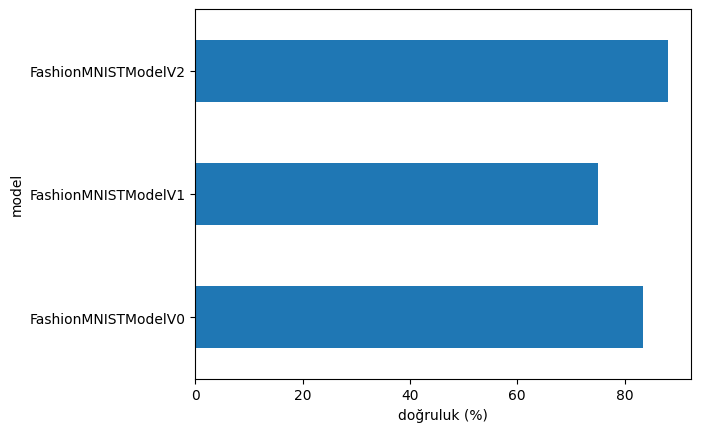

In [ ]:
# Model sonuçlarını görselleştir
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("doğruluk (%)")
plt.ylabel("model")


## 9. En İyi Modelle Rastgele Tahminler Yapma ve Değerlendirme

Tamam, modellerimizi birbirleriyle karşılaştırdık, şimdi en iyi performans gösteren modelimiz `model_2`'yi daha ayrıntılı değerlendirelim.

Bunu yapmak için, modelimizi ve tahmin yapılacak veriyi geçirebileceğimiz bir `make_predictions()` fonksiyonu oluşturalım.


In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Örneği hazırla
            sample = torch.unsqueeze(sample, dim=0).to(device) # Ekstra bir boyut ekle ve örneği cihaza gönder

            # İleri geçiş (model ham logit çıktılarını verir)
            pred_logit = model(sample)

            # Tahmin olasılığını al (logit -> tahmin olasılığı)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Daha fazla hesaplama için pred_prob'u GPU'dan al
            pred_probs.append(pred_prob.cpu())

    # pred_probs'u birleştirerek listeyi tensöre dönüştür
    return torch.stack(pred_probs)


In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# İlk test örneğinin şekli ve etiketi
print(f"Test örneği görüntü şekli: {test_samples[0].shape}\nTest örneği etiketi: {test_labels[0]} ({class_names[test_labels[0]]})")


Test örneği görüntü şekli: torch.Size([1, 28, 28])
Test örneği etiketi: 5 (Sandal)


Ve şimdi `make_predictions()` fonksiyonumuzu kullanarak `test_samples` üzerinde tahmin yapabiliriz.


In [ ]:
# model_2 ile test örnekleri üzerinde tahmin yap
pred_probs = make_predictions(model=model_2,
                               data=test_samples)

# İlk iki tahmin olasılığı listesini görüntüle
pred_probs[:2]


tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

Mükemmel!

Şimdi, tahmin olasılıklarından tahmin etiketlerine geçebiliriz, bunu `torch.softmax()` aktivasyon fonksiyonunun çıktısının `torch.argmax()`'ını alarak yapacağız.


In [ ]:
# Tahmin olasılıklarını, argmax() alarak tahmin etiketlerine dönüştür
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
# Tahminlerimiz test etiketlerimizle aynı formda mı?
test_labels, pred_classes


([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

Şimdi, tahmin edilen sınıflarımız test etiketlerimizle aynı formatta olduğuna göre, karşılaştırabiliriz.

Görüntü verisiyle çalıştığımız için, veri gezgininin motto'suna sadık kalalım.

"Visualize, visualize, visualize!"


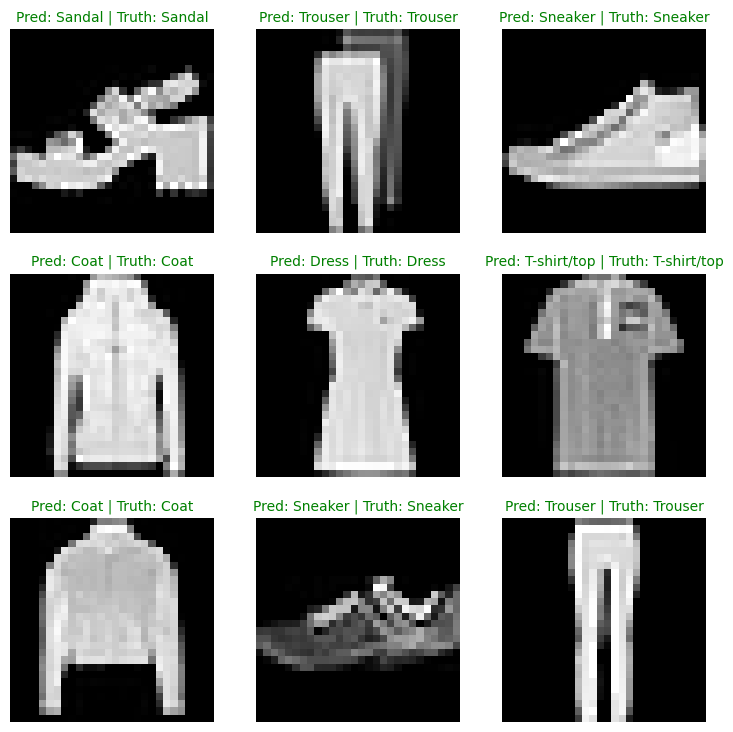

In [ ]:
# Tahminleri görselleştir
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Alt grafik oluştur
  plt.subplot(nrows, ncols, i+1)

  # Hedef görüntüyü çiz
  plt.imshow(sample.squeeze(), cmap="gray")

  # Tahmin etiketini bul (metin şeklinde, örneğin "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Gerçek etiketini al (metin şeklinde, örneğin "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Grafik başlık metnini oluştur
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Eşitliği kontrol et ve başlık rengini buna göre değiştir
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # doğruysa yeşil metin
  else:
      plt.title(title_text, fontsize=10, c="r") # yanlışsa kırmızı metin
  plt.axis(False);


Vay, vay, vay, oldukça güzel görünmüyor mu?

Bir kaç düzine satır PyTorch kodu için fena değil!


## 10. Daha Fazla Tahmin Değerlendirmesi İçin Bir Karışıklık Matrisi Oluşturma

Sınıflandırma problemleri için kullanabileceğimiz birçok [farklı değerlendirme metriği](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics) vardır.

En görsel olanlardan biri [karışıklık matrisidir](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

Bir karışıklık matrisi, sınıflandırma modelinizin tahminler ile gerçek etiketler arasındaki farkı nerede yaptığını gösterir.

Bir karışıklık matrisi oluşturmak için üç adımı takip edeceğiz:
1. Eğittiğimiz model olan `model_2` ile tahminler yapın (karışıklık matrisi tahminleri gerçek etiketlerle karşılaştırır).
2. Karışıklık matrisini [`torch.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix) kullanarak oluşturun.
3. Karışıklık matrisini [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/) kullanarak görselleştirin.

Eğittiğimiz model ile tahminler yaparak başlayalım.

In [ ]:
# Progress çubuğu için tqdm'yi içe aktar
from tqdm.auto import tqdm

# 1. Eğitilmiş model ile tahminler yap
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Tahminler yapılıyor"):
    # Verileri ve etiketleri hedef cihaza gönder
    X, y = X.to(device), y.to(device)
    # İleri geçiş
    y_logit = model_2(X)
    # Tahminleri logitlerden -> tahmin olasılıklarına -> tahmin etiketlerine çevir
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Tahminleri değerlendirme için CPU'ya al
    y_preds.append(y_pred.cpu())
# Tahmin listesini tensöre birleştir
y_pred_tensor = torch.cat(y_preds)


Tahminler yapılıyor:   0%|          | 0/313 [00:00<?, ?it/s]

Harika!

Şimdi tahminlerimiz var, hadi 2. ve 3. adımları geçelim:
2. Karışıklık matrisini [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix) kullanarak oluşturalım.
3. Karışıklık matrisini [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/) kullanarak görselleştirelim.

Öncelikle, karışıklık matrisi oluşturmak ve görselleştirmek için `torchmetrics` ve `mlxtend` kütüphanelerinin yüklü olduğundan emin olmalıyız (bu iki kütüphane karışıklık matrisi yapmamıza ve görselleştirmemize yardımcı olacak).

> **Not:** Google Colab kullanıyorsanız, varsayılan olarak yüklü olan `mlxtend` sürümü 0.14.0'dır (Mart 2022 itibariyle). Ancak, kullanmak istediğimiz `plot_confusion_matrix()` fonksiyonunun parametreleri için 0.19.0 veya daha yüksek bir sürüme ihtiyacımız var.


In [ ]:
# torchmetrics'in yüklü olup olmadığını kontrol et, eğer değilse yükle
try:
    import torchmetrics, mlxtend
    print(f"mlxtend sürümü: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend sürümü 0.19.0 veya daha yüksek olmalıdır"
except:
    !pip install -q torchmetrics -U mlxtend # <- Not: Google Colab kullanıyorsanız, bu işlem çalışma ortamını yeniden başlatmanızı gerektirebilir
    import torchmetrics, mlxtend
    print(f"mlxtend sürümü: {mlxtend.__version__}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 39.3 MB/s eta 0:00:00
mlxtend sürümü: 0.23.3


Karışıklık matrisini görselleştirmek için, `mlxtend` sürümünün 0.19.0 veya daha yüksek olduğundan emin olmamız gerekiyor.


In [ ]:
# Yükseltilmiş mlxtend sürümünü içe aktar
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # sürüm 0.19.0 veya daha yüksek olmalı


0.23.3


`torchmetrics` ve `mlxtend` yüklendi, şimdi bir karışıklık matrisi oluşturalım!

İlk olarak, `num_classes=len(class_names)` diyerek kaç sınıfla çalıştığımızı belirterek bir `torchmetrics.ConfusionMatrix` örneği oluşturacağız.

Ardından, örneğimizi, modelimizin tahminlerini (`preds=y_pred_tensor`) ve hedefleri (`target=test_data.targets`) geçirerek bir karışıklık matrisi (tensor formatında) oluşturacağız.

Son olarak, `mlxtend.plotting`'ten `plot_confusion_matrix()` fonksiyonunu kullanarak karışıklık matrisimizi görselleştirebiliriz.


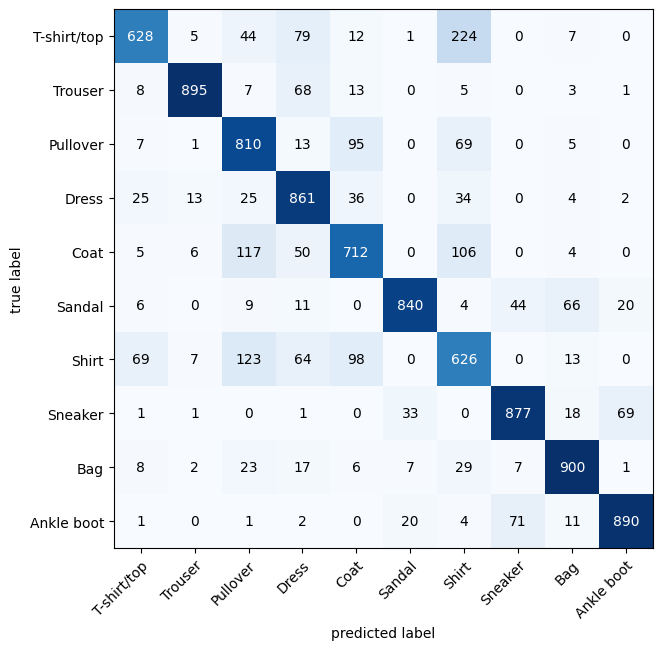

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Karışıklık matrisi oluştur ve tahminleri hedeflerle karşılaştır
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Karışıklık matrisini görselleştir
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),  # matplotlib NumPy formatında çalışmayı tercih eder
    class_names=class_names,          # Satır ve sütun etiketlerini sınıf isimleriyle belirt
    figsize=(10, 7)
)


Vay! Görünüşe göre oldukça güzel görünüyor!

Modelimizin oldukça iyi performans gösterdiğini görebiliyoruz, çünkü çoğu karanlık kare sol üstten sağ alt köşeye kadar olan diyagonal üzerinde yer almakta (ideal bir model sadece bu karelerde değerler içerir ve diğer her yerde 0 olur).

Model, benzer sınıflarda en çok "karışıyor", örneğin "Pullover" yerine aslında "Shirt" olarak etiketlenen görüntülerde tahmin yapıyor.

Aynı şekilde, "Shirt" yerine aslında "T-shirt/top" olarak etiketlenen sınıflar için tahmin yapıyor.

Bu tür bilgiler, tek bir doğruluk metriğinden daha faydalıdır çünkü modelin *nerede* hata yaptığını gösterir.

Ayrıca, modelin neden bazı şeyleri yanlış yapıyor olabileceğini de ipucu verir.

Modelin bazen "Shirt" tahmini yapmasının "T-shirt/top" etiketli görüntüler için anlaşılabilir olduğunu kabul edebiliriz.

Bu tür bilgileri, modellerimizi ve verilerimizi daha detaylı incelemek için kullanabiliriz ve bu, iyileştirilmesi gereken alanları ortaya çıkarır.

> **Egzersiz:** Eğittiğimiz `model_2`'yi test FashionMNIST veri seti üzerinde tahminler yapmak için kullanın. Sonra, modelin yanlış tahmin yaptığı bazı örnekleri, görüntünün etiketinin ne olması gerektiğiyle birlikte görselleştirin. Bu tahminleri görselleştirdikten sonra bunun bir modelleme hatası mı yoksa veri hatası mı olduğunu düşünüyorsunuz? Yani, modelin daha iyi yapabilmesi mümkün mü yoksa verinin etiketleri birbirine çok yakın mı? (Örneğin, "Shirt" etiketi "T-shirt/top" ile çok yakın mı?)


## 11. En İyi Performans Gösteren Modeli Kaydetme ve Yükleme

Bu bölümü, en iyi performans gösteren modelimizi kaydederek ve yükleyerek bitirelim.

[Notebook 01'den](https://www.learnpytorch.io/01_pytorch_workflow/#5-saving-and-loading-a-pytorch-model) hatırlayacağınız gibi, bir PyTorch modelini kaydetmek ve yüklemek için şu kombinasyonu kullanabiliriz:
* `torch.save` - Bir PyTorch modelini veya modelin `state_dict()`'ini kaydetmek için bir fonksiyon.
* `torch.load` - Kaydedilmiş bir PyTorch nesnesini yüklemek için bir fonksiyon.
* `torch.nn.Module.load_state_dict()` - Kaydedilmiş bir `state_dict()`'i mevcut bir model örneğine yüklemek için bir fonksiyon.

Bu üç fonksiyonu daha ayrıntılı olarak [PyTorch model kaydetme ve yükleme dokümantasyonunda](https://pytorch.org/tutorials/beginner/saving_loading_models.html) görebilirsiniz.

Şimdi, `model_2`'nin `state_dict()`'ini kaydedelim, sonra geri yükleyip yüklemenin doğru yapıldığından emin olmak için değerlendirelim.


In [ ]:
from pathlib import Path

# Modeller dizini oluştur (eğer zaten yoksa), bakınız: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # gerekirse üst dizinleri oluştur
                 exist_ok=True # models dizini zaten varsa hata verme
)

# Model kaydetme yolu oluştur
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Modelin state_dict()'ini kaydet
print(f"Model kaydediliyor: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # sadece state_dict() kaydediliyor, sadece öğrenilen parametreler kaydedilir
           f=MODEL_SAVE_PATH)


Model kaydediliyor: models/03_pytorch_computer_vision_model_2.pth


Şimdi kaydedilmiş bir model `state_dict()`'imiz var, bunu `load_state_dict()` ve `torch.load()` kombinasyonu kullanarak geri yükleyebiliriz.

`load_state_dict()` kullandığımız için, kaydedilmiş model `state_dict()` ile aynı giriş parametrelerine sahip yeni bir `FashionMNISTModelV2()` örneği oluşturmamız gerekecek.


In [ ]:
# Yeni bir FashionMNISTModelV2 örneği oluştur (aynı sınıfı kaydedilen state_dict() ile kullanıyoruz)
# Not: Modeli yüklerken şekiller burada kaydedilen sürümle aynı değilse hata alırsınız
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # bunu 128 olarak değiştirip ne olduğunu görmek için deneyin
                                    output_shape=10)

# Kaydedilen state_dict()'i yükle
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Modeli GPU'ya gönder
loaded_model_2 = loaded_model_2.to(device)


<ipython-input-62-e73a9791a2bf>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


Ve şimdi yüklediğimiz bir modelimiz var, bunu `eval_model()` ile değerlendirerek, parametrelerinin kaydetmeden önceki `model_2` ile benzer şekilde çalıştığından emin olabiliriz.


In [ ]:
# Yüklenen modeli değerlendirme
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

Bu sonuçlar, `model_2_results` ile aynı görünüyor mu?


In [ ]:
model_2_results


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

İki tensörün birbirine yakın olup olmadığını, `torch.isclose()` fonksiyonunu kullanarak ve yakınlık için bir tolerans seviyesi belirterek öğrenebiliriz. Bunun için `atol` (mutlak tolerans) ve `rtol` (göreli tolerans) parametrelerini kullanırız.

Eğer modelimizin sonuçları yakınsa, `torch.isclose()` fonksiyonunun çıktısı doğru olmalıdır.


In [ ]:
# Sonuçların birbirine yakın olup olmadığını kontrol et (çok uzaklarsa bir hata olabilir)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # mutlak tolerans
              rtol=0.0001) # göreli tolerans


tensor(True)